0.999999999987
0.0149937526031


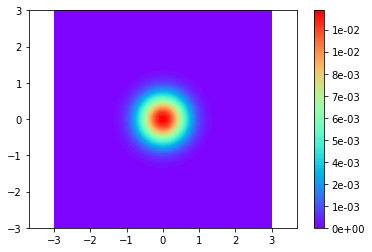

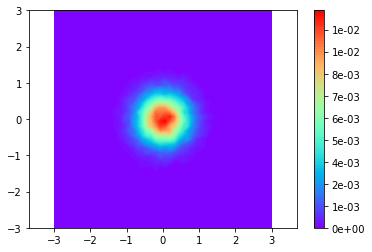

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math as M

# %matplotlib notebook

plt.close('all')

def RVM(n,mu,sigma):
    x=np.random.normal(mu, sigma,n)
    y=np.random.normal(mu, sigma,n)
    z=x+1j*y
    Pa=np.zeros_like(z)
    Pa+=z
#     plt.figure()
#     plt.axis('equal')
#     plt.scatter(Pa.real,Pa.imag)
#     plt.show()    
    return Pa,x,y

def heat_kernel(r,kin_visc,dt):
    f = (1/(4*np.pi*kin_visc*dt))*np.exp((-r**2)/(4*kin_visc*dt))
    return f


def exact(mu,sigma,N):
    xe,ye=np.linspace(-3,3,N),np.linspace(-3,3,N)
    gridx,gridy=np.meshgrid(xe,ye)
    Z=gridx+1j*gridy
    r=np.abs(Z)
    omega = heat_kernel(r,nu,tf)
    h=xe[1]-xe[0]
    omega=omega*GAMMA*h**2
    plt.figure()
    plt.contourf(gridx,gridy,omega,100,cmap=cm.rainbow)
    gamma_arr[idx,idy]+=m2x*m2y*gamma
    idx=0    m1=0.0    
def get_box_data(value,arr):

    m2=0.0

    plt.colorbar(format='%.0e')
    plt.axis('equal')
    return omega,xe,ye

def gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy):
    gamma_arr[idx-1,idy-1]+=m1x*m1y*gamma        if value < arr[i]:
#             print('here')
            m1=-arr[i-1]+value
            m2=arr[i]-value

    gamma_arr[idx,idy-1]+=m2x*m1y*gamma
    gamma_arr[idx-1,idy]+=m1x*m2y*gamma
    for i in range(len(arr)):
            idx=i
            break
#         print m1,m2,i,value,arr[i]
    return m1,m2,idx

def interp(Pa,xe,ye,gamma_arr,gamma):
    for i in range(len(Pa)):
        m1x,m2x,idx=get_box_data(Pa[i].real,xe)
        m1y,m2y,idy=get_box_data(Pa[i].imag,ye)
#         print(xe[idx-1],xe[idx],Pa[i].real,idx,ye[idy-1],ye[idy],Pa[i].imag,idy)
        gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy)
        gridx,gridy=np.meshgrid(xe,ye)
N=50
t=0.0



plt.close('all')        
    h=xe[1]-xe[0]
    gamma_arr=gamma_arr/h**2
    plt.figure()
    plt.contourf(gridx,gridy,gamma_arr,100,cmap=cm.rainbow)
    plt.colorbar(format='%.0e')
    plt.axis('equal')


GAMMA=1.0
nu=0.1
# dt=0.1
tf=1.0
n=20000


sigma=np.sqrt(2*nu*tf)
gamma=GAMMA/n
mu=0.0

gamma_arr=np.zeros((N,N))
omega,xe,ye=exact(mu,sigma,N)
Pa,x,y=RVM(n,mu,sigma)
# while t<tf:
#     sigma=np.sqrt(2*nu*dt)
#     Pa,x,y=RVM(n,mu,sigma)
#     t+=dt
#     print t
    
# print(xe)
# print(ye)
interp(Pa,xe,ye,gamma_arr,gamma)
print(sum(sum(omega)))
print(sum(sum(gamma_arr)))
# error=np.sqrt((sum(sum(omega-gamma_arr)**2))/N**2)
# print(error)


# X,Y=np.meshgrid(xe,ye)

# fig=plt.figure()
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# p = ax.plot_surface(X, Y, omega, rstride=2, cstride=2, linewidth=0, cmap=cm.rainbow)

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# p = ax.plot_surface(X, Y, gamma_arr, rstride=2, cstride=2, linewidth=0,cmap=cm.rainbow)

plt.show()
